In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Data/all_stocks_5yr.csv', parse_dates=True)

In [4]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
'''
Next, we're going to extract a new data frame by filtering all the rows where the name is SBUX.
'''

sbux=data[data['Name']=='SBUX'].copy()
sbux.head()

,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


<AxesSubplot:>

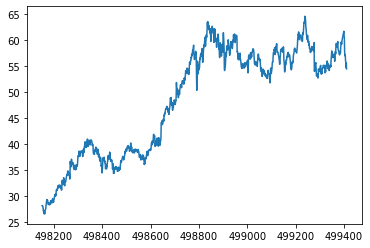

In [6]:
'''
Next, we can call the plot function on the clothes column to look at the stock price as a time series.
'''
sbux['close'].plot()

In [7]:
''' l
Now, to get down to the real work, we know that in order to calculate the return, we need the current
close price as well as the previous close price.

What we want to have is the previous close price in the same row as the close price to do this, we
can call the shift function, we pass on the value one.

To say that we want to shift the close call by one will assign this new column to be priv close.

If we use the head, come in again, we see that our new column of clothes has been created.

Notice how all the items in the clothes column are just the items from the clothes column shifted up
by one.
Since there is nothing to shift up, buy one for the very first value. This value must necessarily be NaN.
'''

sbux['prev_close']=sbux['close'].shift(1)
sbux.head()

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [8]:
''' l
In the next block of code, we calculate the return as discussed previously.

That's the close column divided by the previous column and then minus one will assign this value to
a column called Return.
'''
from IPython.display import display, Math, Latex
display(Math(r'R = {P_t \over P_{t-1}}-1'))

<IPython.core.display.Math object>

In [9]:
%%latex
\begin{align}
\newline
R= {{P_{t}\over P_{t-1}} -1}
\end{align}

<IPython.core.display.Latex object>

In [10]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} R= {{P_{t}\over P_{t-1}} -1}
\end{eqnarray}""")

<IPython.core.display.Latex object>

In [11]:
'''
Note the use of vectorized operations here.
There's no need to do something like a for loop through each row, calculating the return one by one.

If you're trained in programming, that's probably your first thought for how to calculate the return,
given a two dimensional array of items.

But luckily, pandas make this operation very easy by allowing us to calculate all of the returns at once.

If we do a sbux.head() again to see what our new data frame looks like, we see our return.

Collum note again how the first row is NaN This must be the case since we've prev_close is NaN and therefore it's not possible to calculate
the return on this date.

Also, notice how small the returns are, as mentioned, financial engineers are pretty accustomed to
working with very small numbers like this, and that's why we use units such as basis points.
'''
sbux['return']=sbux['close']/sbux['prev_close'] -1
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [12]:
'''
The way to do this is we call the pct_change function.
We pass in the argument one to mean that we want to calculate the percent change over one timestep.

Upon inspection, we see that both the return and return2 to columns are the same, verifying that our
calculation of the return is correct.
'''
sbux['return2']=sbux['close'].pct_change(1)
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


<AxesSubplot:>

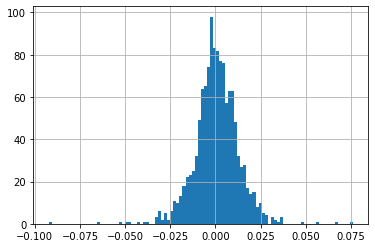

In [13]:
'''
Although up until now, we've been plotting Time series, what we are often interested in when we look
at returns is the distribution of returns.

One quick visualization we can do to get a feel for the distribution of a set of numbers is the histogram in pendas.

All we need to do is call the highest hist on our data frame or series object.
We pass in the bins argument to specify how fine grained we want the histogram to be.

So as you can see, what we get is this typical bell shaped curve.
'''

sbux['return'].hist(bins=100)

In [14]:
'''
Another thing we can do with our series of returns is calculate statistics such as the sample mean and
the sample variance.

The STD function actually gives us the standard deviation, which is the square root of the variance.
l l
As you can see, the return is very small, very close to zero, and the standard deviation is also
quite small, about zero point zero one.

'''

sbux['return'].mean(),sbux['return'].std()

(0.0006002332205830914, 0.012360934026133882)

In [15]:
'''
Now, since we learned about log returns as well, let's try doing the same process, but on the log
returns, luckily numpy operations, broadcast over pandas data structures.

So all we need to do is take the return coloumn at once and called log on that.

you recall that when X is very small, it's approximately equal to log(X+1), and we can see that
kind of behavior here.

Notice how the log returns are actually very close to the non log returns.
They only differ in about the last two decimal places.
'''

sbux['log_return']=np.log(sbux['return']+1)
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2,log_return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028


<AxesSubplot:>

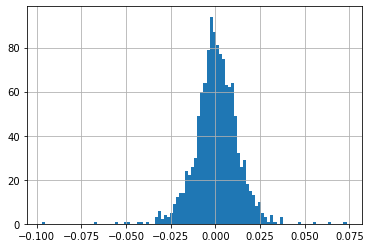

In [16]:
'''
Next, we're going to plot a histogram of our log returns using the highest function, as you can see,
we get pretty much the exact same distribution that we got for the non log returns.
'''

sbux['log_return'].hist(bins=100)

In [17]:
'''
Finally, we can calculate the sample mean and the sample standard deviation of the log return again

as before, we see that the mean is very close to zero
and the standard deviation is about zero point zero one.
'''
sbux['log_return'].mean(),sbux['log_return'].std()

(0.000523590274810868, 0.012381234216101253)

In [18]:
'''
Before we make any Q-Q plots, I want to start by simply drawing the normal PDF over the histogram.

We know that theoretically the histogram will approach the true distribution as the number of samples
collected approaches infinity.

So if the distribution we choose is a good fit, then it's histogram should match up pretty closely
with the true distribution.
'''
from scipy.stats import norm
'''
We can create a list of X coordinates which will span from the minimum return to the maximum return,
with 100 points in between, as you recall.
This can be accomplished with the linspace function.
'''
x_list=np.linspace(sbux['return'].min(), sbux['return'].max(),100)

In [19]:
'''
Next, we're going to generate the normal PDF with mean and standard deviation equal to the sample mean
and sample standard deviation of our returns.

We can accomplish this by calling the function norm.pdf(x_list,loc=sbux['return'].mean(),scale=sbux['return'].std())

the first argument is the X coordinates.
The second argument is the mean and the third argument is the scale, which for the normal distribution
is the standard deviation.
'''
y_list=norm.pdf(x_list,loc=sbux['return'].mean(),scale=sbux['return'].std())

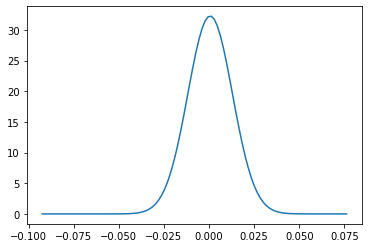

In [20]:
plt.plot(x_list,y_list)

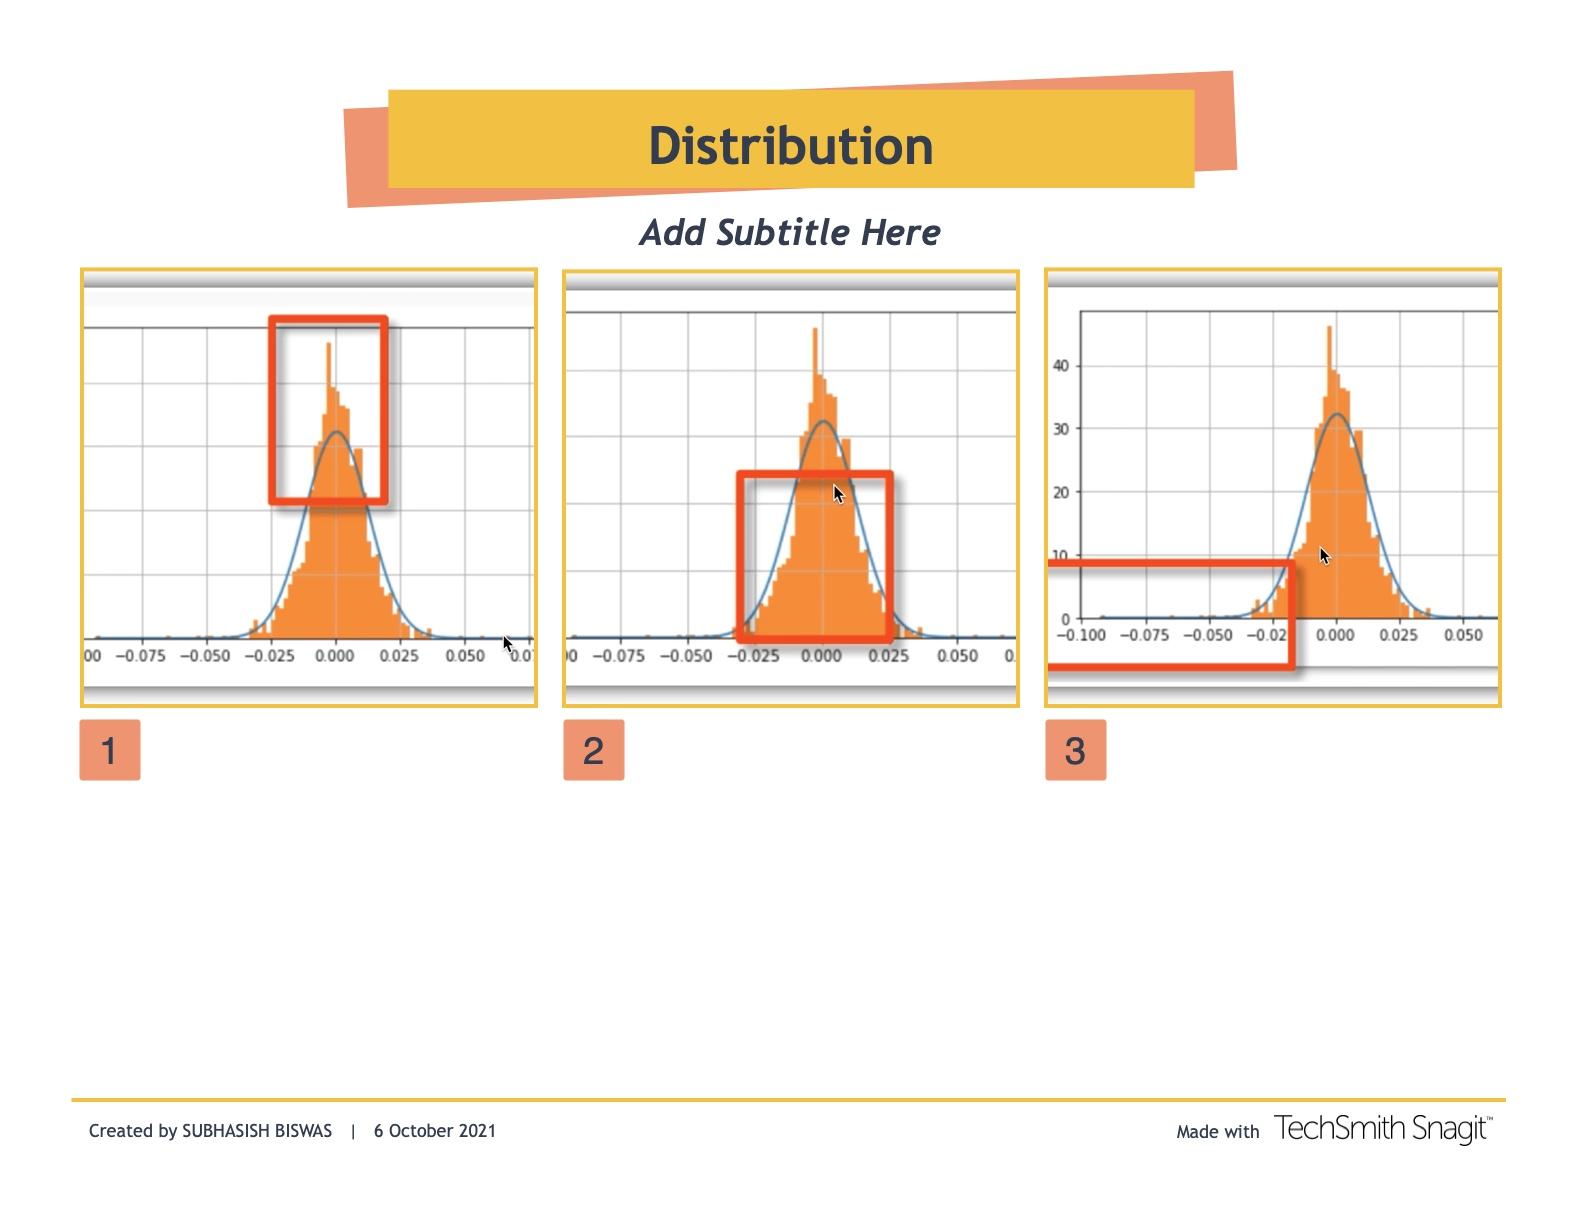

In [21]:
from IPython.display import Image
Image(filename='/Users/subhasish/Documents/Apple/Snagit/Distribution.jpg')

<AxesSubplot:>

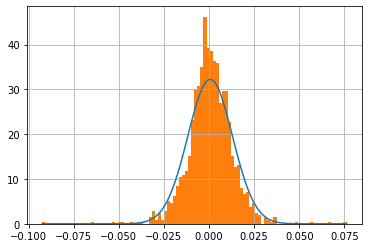

In [22]:
'''
Next, we can draw a plot of our PDF along with the histogram, simply by calling the plot function
and the hist function separately.

Note that for the hist function we need to pass in the argument, density = true, so that the
histogram is normalized by default histogram.

So what do we see, as you can see, this is probably not quite a good fit.
It's reasonable, but there are some areas of the plot which don't look nice.

For example, in the center, the data has a much higher frequency than predicted by the normal distribution.
There also appear to be pretty significant gaps in the shoulders of the distribution.

And thirdly, the returns seem to take on pretty extreme values, which should be very unlikely according
to the normal distribution.
'''
plt.plot(x_list,y_list)
sbux['return'].hist(bins=100,density=True)

((array([-3.26318411, -3.00291115, -2.85798028, ...,  2.85798028,
          3.00291115,  3.26318411]),
  array([-0.09243697, -0.06519128, -0.05321627, ...,  0.05617538,
          0.06623157,  0.0761332 ])),
 (0.012069021175478525, 0.0006002332205830934, 0.9745536080830226))

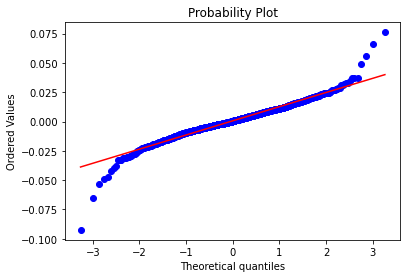

In [23]:
'''
Let's now see how we can generate a Q-Q plot to verify what we've seen, one method of doing this is
to simply use the probplot function from scipy.stats.

As you recall, another name for the Q-Q plot is the probability plot in the next block, we call the
probplot function.

The first argument is the data That's the sbux returns, but we call drop in a first so that we only pass in actual numbers.

Next, we say dist='norm',To say that we want to compare our data with the normal distribution

we say fit=True so that the function will find the best parameters for the normal distribution that will match with our data.

Finally, we pass in a plot equals party, which corresponds to matplotlib, which we imported earlier
'''

from scipy.stats import probplot
probplot(sbux['return'].dropna(),dist='norm',fit=True,plot=plt)

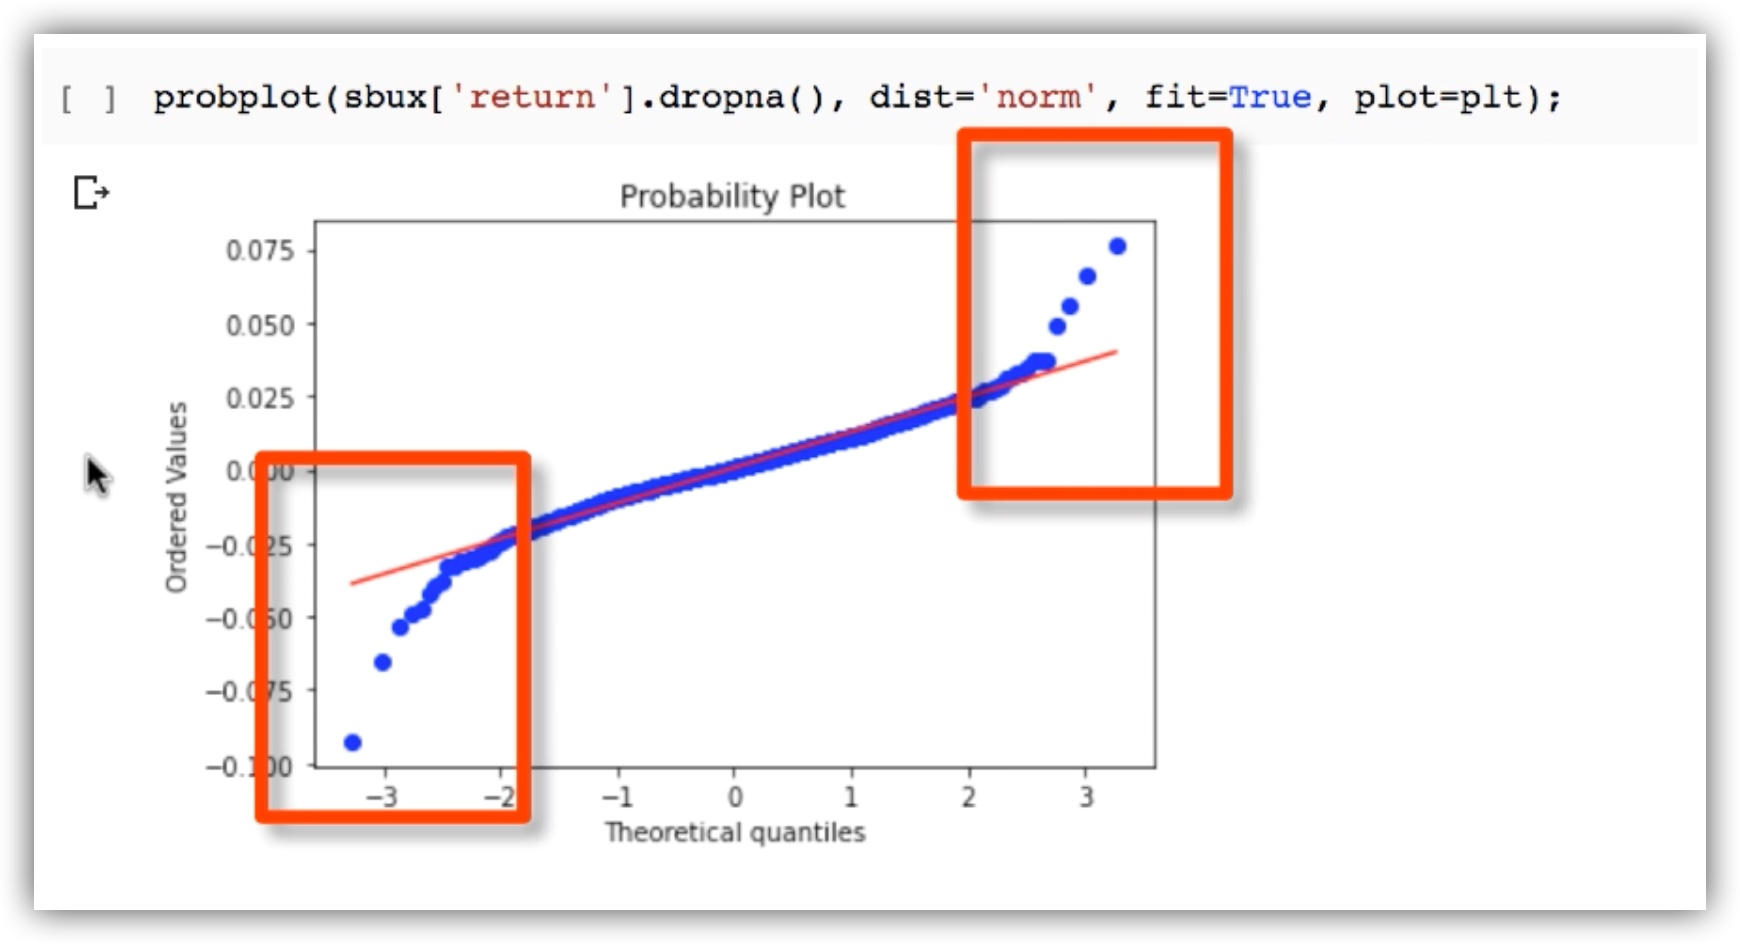

In [24]:
'''
So if we look at the probability plot, what do we see?

Well, we see pretty significant divergence at the ends of the probability plot.
This suggests that our data has much heavier tails than expected if it came from the normal distribution,
which confirms what we were seeing earlier.
'''
Image('/Users/subhasish/Documents/Apple/Snagit/Q-QPlot.jpg')

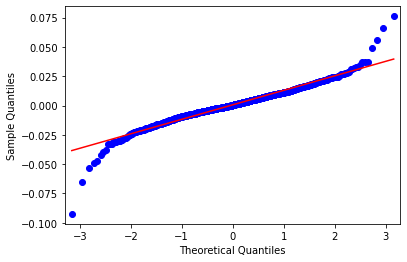

In [25]:
'''
The next thing I want to do in this script is to show you how to make the exact same Q-Q plot by using
stat's models rather than scipy

As input, we pass in our data again, first calling drop in to remove any NaN values and line=s

So what does line='s' mean?

S means that the line is standardized.
That is, its scaled and shifted by the standard deviation and mean of our data.

There are other possibilities such as R, which means to fit a regression line if you want to learn
about the different arguments you can pass into this function.
'''

import statsmodels.api as sm
sm.qqplot(sbux['return'].dropna(),line='s');

In [26]:
'''
Now, as you know, in finance, sometimes we like to work with the log returns rather than the returns.
So let's see if anything changes when we use the log returns instead.

Well, we see that the picture pretty much looks exactly the same.
How can this be?

Well, recall that when the values of the returns are very nearly zero, adding one and taking the log
does not change its value by a lot.

In other words, X is approximately equal to log(1+X) when X is near zero.
Again, we see the same pattern where the histogram is taller than the theoretical distribution and
has much more extreme values than the theoretical distribution would admit.
'''
x_list=np.linspace(sbux['log_return'].min(), sbux['log_return'].max(),100)
y_list=norm.pdf(x_list,loc=sbux['log_return'].mean(),scale=sbux['log_return'].std())

<AxesSubplot:>

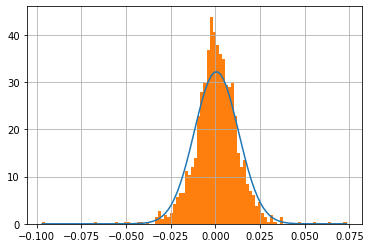

In [27]:
plt.plot(x_list,y_list)
sbux['log_return'].hist(bins=100,density=True)

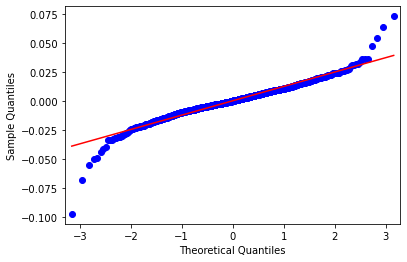

In [28]:
'''
If we look at the Q-Q plot, we again see the same pattern, the points diverge at the ends because
it has heavier tails compared to the theoretical distribution.

'''
sm.qqplot(sbux['log_return'].dropna(),line='s');

In [29]:
'''
now we're going to do them with the T distribution instead of the normal distribution.
To recap, we're going to plot a histogram alongside a plot of the PDF of a T distribution where the
parameters of the T distribution are the parameters of best fit given the data.
Next, we'll look at the Q-Q plot of the data against the same T distribution.
Then we'll repeat those two steps with the log returns instead of the actual returns.
'''

from scipy.stats import t #importing t-distribution

'''
We can create a list of X coordinates which will span from the minimum return to the maximum return,
with 100 points in between, as you recall.
This can be accomplished with the linspace function.
'''
x_list=np.linspace(sbux['return'].max(),sbux['return'].min(),100)

In [30]:
'''
Next, I'm going to call t.fit(sbux['return'].dropna()) to get the parameters of the best fitting t distribution to our returns,
data.

If we print out programs, we can see that it's a tuple containing three values.


'''
params = t.fit(sbux['return'].dropna())
params

(4.78753221828017, 0.0007108616716254146, 0.009341981642040986)

In [31]:
'''
Now, it's not clear what these three values represent.
Let's assume that they are in the order of degrees of freedom, location and scale, and then if we're
wrong, then our plot will look bad.
'''
df,loc,scale=params

In [32]:
'''
So next, we're going to get the PDF of the T distribution using these parameters as before, the first
argument is the X values and the next few arguments are the parameters.
'''

y_list=t.pdf(x_list,df,loc,scale)

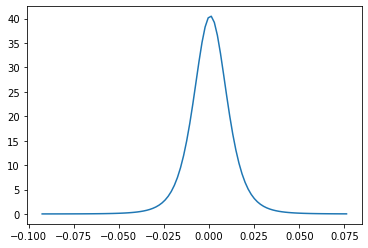

In [33]:
plt.plot(x_list,y_list)

<AxesSubplot:>

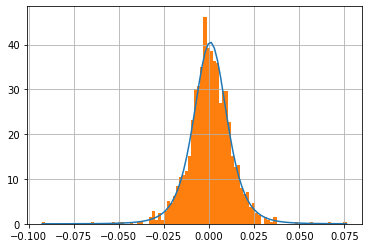

In [34]:
'''
Next, we plot the PDF and the histogram side by side using the same code as before.
So clearly, this is very exciting.

We see that the T distribution is a much better fit than the normal distribution.

The peak of the distribution almost perfectly captures the peak of the data.

Furthermore, there is no gap in the shoulders of the distribution as there was with the normal.

And that's because that weight is being distributed across the tables and the head.
'''
plt.plot(x_list,y_list)
sbux['return'].hist(bins=100,density=True)

In [35]:
'''
Now, you might assume, given the documentation, that we can simply pass in the T module for the defense
argument.

The reason we didn't need to pass in anything before is because the default is the normal distribution.

Now that we want to compare it to a distribution other than the normal, we need to specify which distribution
explicitly.

So if we look closely, it looks like we're trying to call a function at PPF, but it's missing an argument
for df., which is the degrees of freedom, by the way, you also want to be careful when you're working
with variables called df., because we often use the df four degrees of freedom in addition to often
using df. for data frames.

In any case, this makes complete sense.

The reason it's complaining is because all of the CPA functions for the T distribution require an argument
for the degrees of freedom.
'''
#sm.qqplot(sbux['return'].dropna(),dist=t,line='s')

"\nNow, you might assume, given the documentation, that we can simply pass in the T module for the defense\nargument.\n\nThe reason we didn't need to pass in anything before is because the default is the normal distribution.\n\nNow that we want to compare it to a distribution other than the normal, we need to specify which distribution\nexplicitly.\n\nSo if we look closely, it looks like we're trying to call a function at PPF, but it's missing an argument\nfor df., which is the degrees of freedom, by the way, you also want to be careful when you're working\nwith variables called df., because we often use the df four degrees of freedom in addition to often\nusing df. for data frames.\n\nIn any case, this makes complete sense.\n\nThe reason it's complaining is because all of the CPA functions for the T distribution require an argument\nfor the degrees of freedom.\n"

In [36]:
'''
Unfortunately, we see that we get pretty much the same error, missing one required positional argument,
D.F. So what can we do?

Well, we can give these functions the arguments they expect.
Specifically, they want to be able to call functions inside the T module, but without the D.F. argument.
'''
#probplot(sbux['return'].dropna(),dist='t',line='s')

'\nUnfortunately, we see that we get pretty much the same error, missing one required positional argument,\nD.F. So what can we do?\n\nWell, we can give these functions the arguments they expect.\nSpecifically, they want to be able to call functions inside the T module, but without the D.F. argument.\n'

In [37]:
'''
We can accomplish this by creating our own custom class.

I'm going to call it myt, inside this class I'm going to first declare a constructor,
which takes in one argument, D.F., this is going to store D.F. as an instance variable so that it never
has to be passed in when we call any subsequent function.

So next I declare a function called fit, which simply calls t.fit(x).
Note that this doesn't actually require a date parameter, but it's called by the Q-Q plot function.

Next is the important one, the PPF function.
This one is only allowed to take in a location and scale, but internally we add the df parameter
by passing in self.df.
'''

class myt:
    def __init__(self,df):
        self.df=df
    def fit(self,x):
        return t.fit(x)
    def ppf(self,x,loc=0,scale=1):
        return t.ppf(x,self.df,loc,scale)

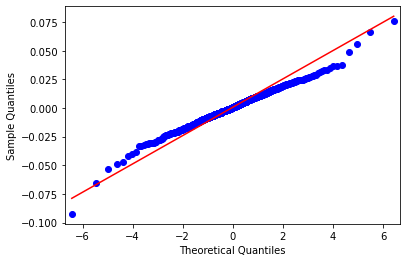

In [38]:
'''
So if we try sm.qqplot plot again, but passing in an object of type might with the degrees of freedom
we found earlier, we see that this now works.

And of course, as our density plot suggested, the t distribution is quite a good fit, the points
are now not diverging at the ends any longer.
'''

'''
The next thing I want to do in this script is to show you how to make the exact same Q-Q plot by using
stat's models rather than scipy

As input, we pass in our data again, first calling drop in to remove any NaN values and line=s

So what does line='s' mean?

S means that the line is standardized.
That is, its scaled and shifted by the standard deviation and mean of our data.

There are other possibilities such as R, which means to fit a regression line if you want to learn
about the different arguments you can pass into this function.
'''

sm.qqplot(sbux['return'].dropna(),dist=myt(df),line='s');

In [39]:
'''
Now, as you know, in finance, sometimes we like to work with the log returns rather than the returns.
So let's see if anything changes when we use the log returns instead.

Well, we see that the picture pretty much looks exactly the same.
How can this be?

Well, recall that when the values of the returns are very nearly zero, adding one and taking the log
does not change its value by a lot.

In other words, X is approximately equal to log(1+X) when X is near zero.
Again, we see the same pattern where the histogram is taller than the theoretical distribution and
has much more extreme values than the theoretical distribution would admit.
'''
x_list=np.linspace(sbux['log_return'].min(), sbux['log_return'].max(),100)
df,loc,scale=t.fit(sbux['log_return'].dropna())
y_list=t.pdf(x_list,df,loc,scale)

<AxesSubplot:>

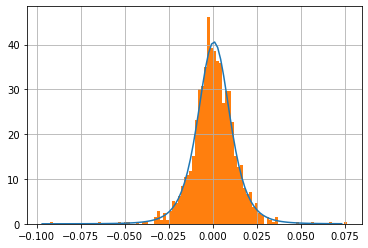

In [40]:
plt.plot(x_list,y_list)
sbux['return'].hist(bins=100,density=True)

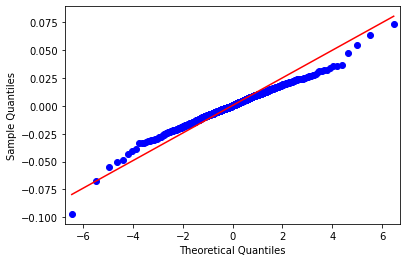

In [41]:
sm.qqplot(sbux['log_return'].dropna(),dist=myt(df),line='s');

In [42]:
'''
First we see that the skew in both cases is negative.

Therefore, we would say that Starbucks returns are slightly left in tail.

You're more likely to get extreme negative values.

Also, in both cases, the excess keratosis is greater than zero.

That is the courtesies for Starbucks returns suggests that they are more heavy tailed than the normal
distribution.

That means we should expect you get more extreme values in general.

'''
sbux["return"].skew()

-0.2680784195824153

In [43]:
sbux["return"].kurtosis()

5.593158903424731

In [44]:
sbux["log_return"].skew()

-0.41015501490182066

In [45]:
sbux["log_return"].kurtosis()

5.964502225799283

In [46]:
'''
Now, just this, a sanity check, since it may not be immediately obvious, we should look at the Skewness
kurtosis values for samples from the normal distribution, 

since we see that both of these values are very close to zero.

This confirms that we are indeed looking at the excess keurtosis and not the keurtosis.

If we were looking at the keratosis, then the sample keratosis should be around three.

'''

sample = pd.Series(np.random.normal(100000))
sample.skew(),sample.kurtosis()

(nan, nan)

In [48]:
'''
To start, we're going to convert all of the Starbuck's returns into a numpy array.
We'll call this array values.
'''
values=sbux['return'].dropna().to_numpy()
values

array([-0.00408018,  0.00213751, -0.00764309, ..., -0.01936525,
        0.01682209, -0.02067973])

In [49]:
'''
Get the mean and standard deviation of the return
'''
m=values.mean()
s=values.std(ddof=1)

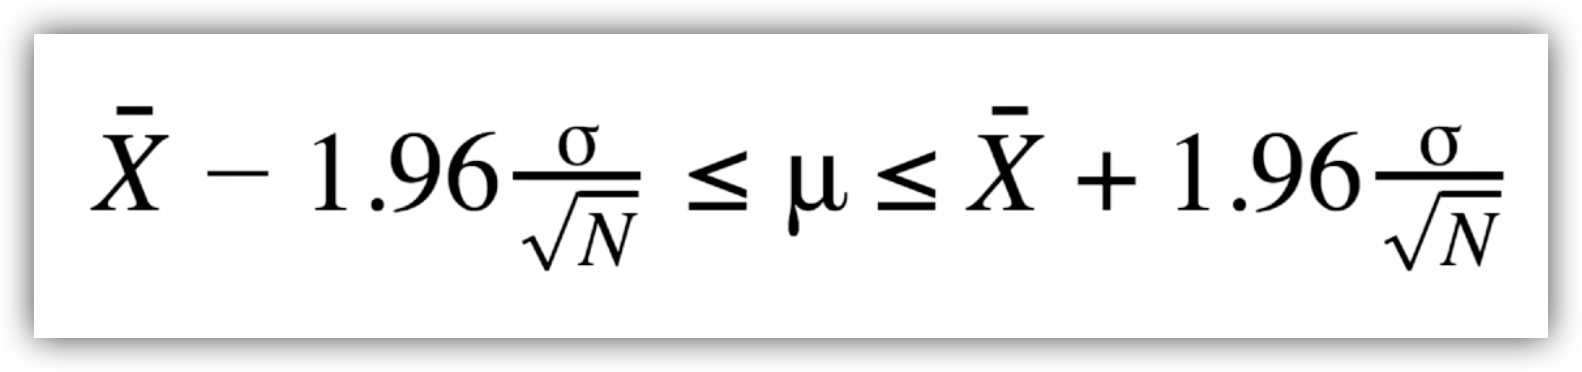

In [50]:
Image('/Users/subhasish/iCloud Drive (Archive)/Documents/Apple/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/ML/SB/TimeSeries/Lazy Programmers/Image/CDF.jpg')

In [55]:
'''
Next, we're going to calculate the lower and upper limit of the confidence interval
'''
low = m-1.96*s/np.sqrt(len(values))
high = m+1.96*s/np.sqrt(len(values))

low,high

(-8.283965370502102e-05, 0.001283306094871204)

<AxesSubplot:>

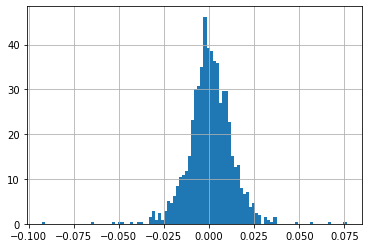

In [56]:
'''
Next, we are going to plot the confidence interval on top of the histogram of the returns.
'''

sbux['return'].hist(bins=100,density=1)

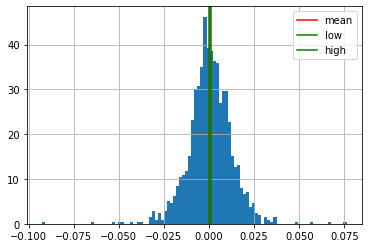

In [64]:
'''
Next, we are going to plot the confidence interval on top of the histogram of the returns.

First, we need to actually plot the histogram of the returns.

Next, I'm going to call the function plt.axvline to draw vertical lines on the plot.
The first vertical line will be located at the location m.
Next I'm going to make a vertical line for the lower limit.
Next, I do the same thing for the upper limit.

Now if you look at the plot, it's kind of hard to see.
That's because the range of values is large relative to the confidence interval.
'''

sbux['return'].hist(bins=100,density=1)
plt.axvline(m,label='mean',color='red')
plt.axvline(low,label='low',color='green')
plt.axvline(high,label='high',color='green')
plt.legend()

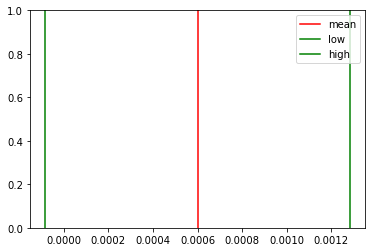

In [65]:
'''
So in the next flight, I'm going to plot only the vertical lines, so this code is the same as before,
except without the histogram.

So we can see true mean lies in between confidence interval
'''

plt.axvline(m,label='mean',color='red')
plt.axvline(low,label='low',color='green')
plt.axvline(high,label='high',color='green')
plt.legend()

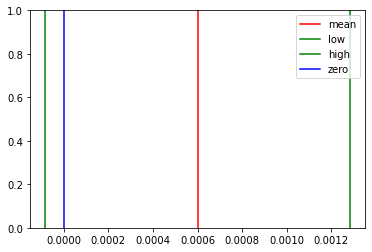

In [63]:
'''
I'm also going to plot a vertical line at the location zero and I'll make this line blue.
If we look at the plot, notice that the confidence interval from the left green line to the right green
line includes the value zero.
It also includes negative values.
'''
plt.axvline(m,label='mean',color='red')
plt.axvline(low,label='low',color='green')
plt.axvline(high,label='high',color='green')
plt.axvline(0,label='zero',color='blue')
plt.legend()